<p><img alt="Colaboratory logo" width="60px" height="50px" src="http://martingramatica.me/img/myNameBlack.png" align="left" hspace="10px" vspace="0px"></p>

<h1>COVID-19 En Argentina</h1>

Utilizando la infromación a nivel global ofrecida en https://github.com/CSSEGISandData me propuse hacer una comparación bajo el concepto de "Diario del Lunes", para ver como las curvas de Argentina se asimilan o disntinguen de otros países con muchos problemas. 

Para el análisis tomo como día 0 el día en donde aparece el primer caso en cada país. En otras palabras, no utilizamos fechas, sino días de afectación de la pandemia en el país bajo análisis. 

Te invito a que participes, ya sea actualizando o corrigiendo datos, aprotando nuevos análisis de la información o simplemente con sugerencias e ideas.

<strong>Gracias!!!</strong>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

currentDirectory = os.getcwd()
days_margin = 18 # amount of days to analyze after the last day in Argentina

In [2]:
# Leemos el archivo csv con los casos
confirmed_df = pd.read_csv(currentDirectory + "\\data_world\\time_series_19-covid-Confirmed.csv") 

del confirmed_df['Lat']
del confirmed_df['Long']
del confirmed_df['Province/State']

confirmed_df = confirmed_df.set_index('Country/Region')

confirmed_df.columns = pd.to_datetime(confirmed_df.columns)

<h2>Argentina vs Italia</h2>

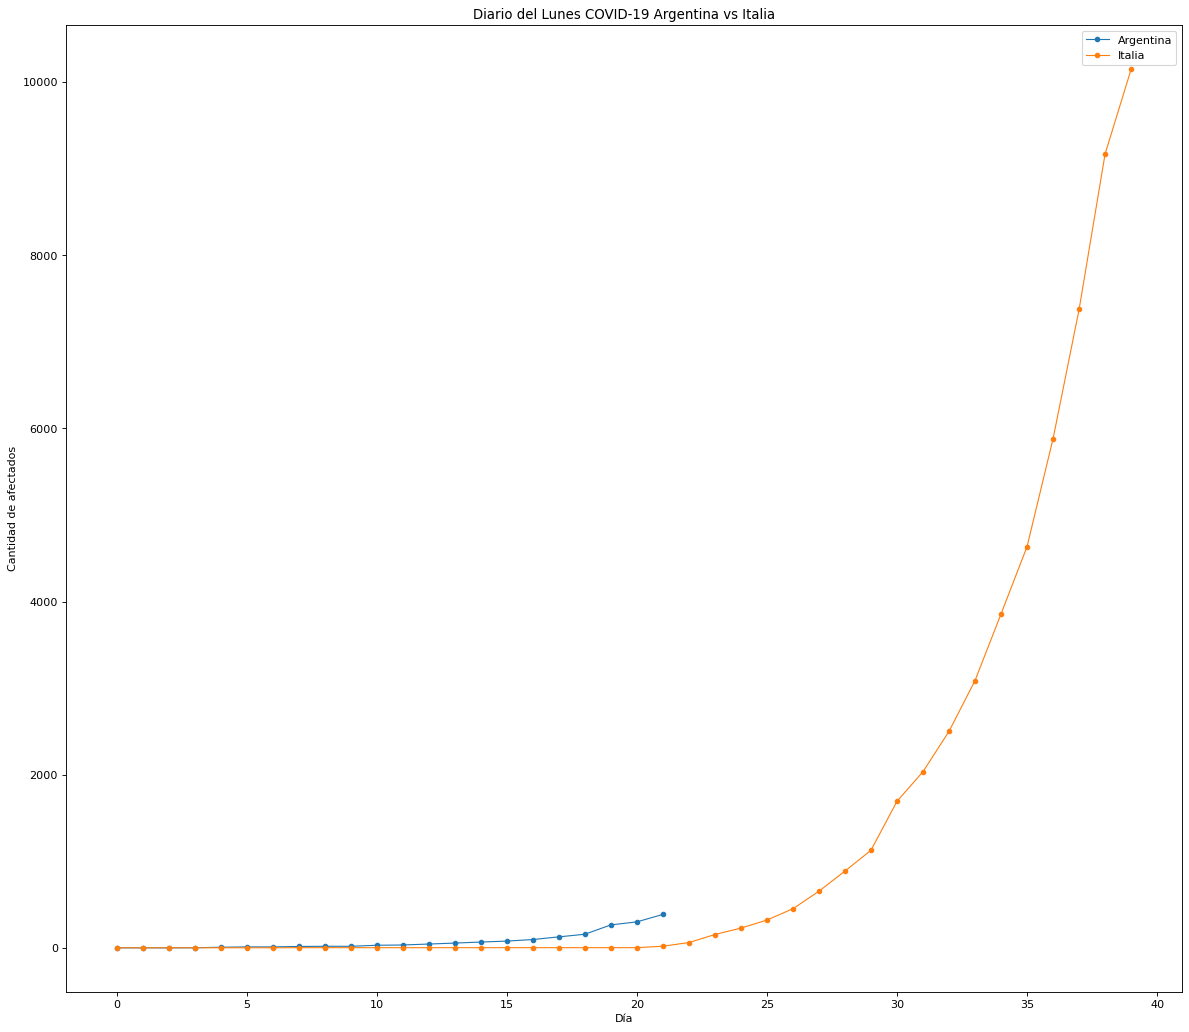

In [3]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

legend = []

arg = confirmed_df.loc['Argentina',:][confirmed_df.loc['Argentina',:]>0]
arg.reset_index(drop=True, inplace=True)
arg.plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Argentina')

comp = confirmed_df.loc['Italy',:][confirmed_df.loc['Italy',:]>0]
comp = comp[0:arg.count()+days_margin]
comp.reset_index(drop=True, inplace=True)
comp.plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Italia')

plt.title('Diario del Lunes COVID-19 Argentina vs Italia')
plt.legend(legend)

plt.xlabel('Día')
plt.ylabel('Cantidad de afectados')

plt.show()

<h2>Argentina vs España</h2>

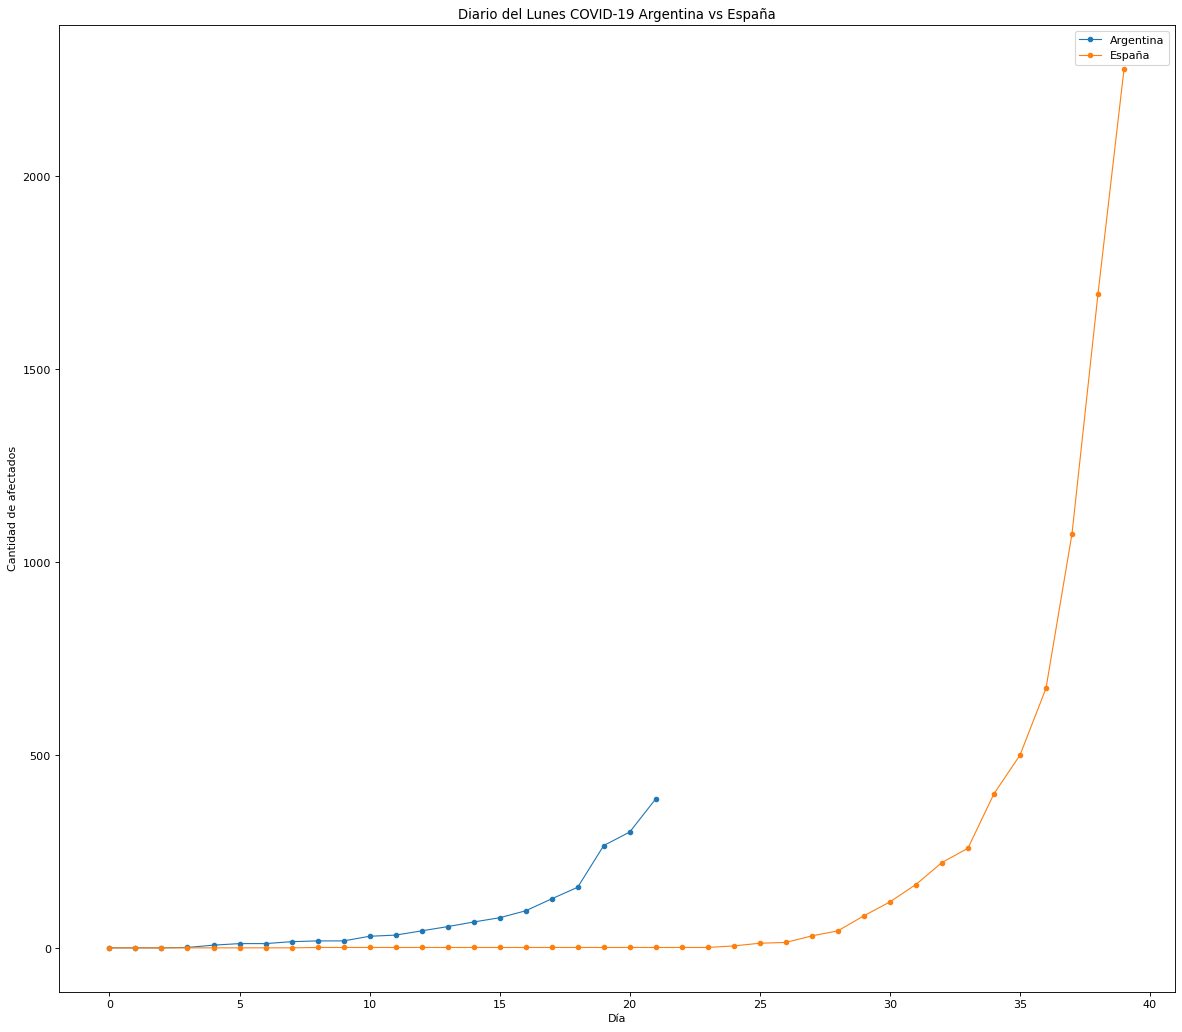

In [4]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

legend = []

arg.plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Argentina')

comp = confirmed_df.loc['Spain',:][confirmed_df.loc['Spain',:]>0]
comp = comp[0:arg.count()+days_margin]
comp.reset_index(drop=True, inplace=True)
comp.plot.line(marker="o", linewidth=1, markersize=4)
legend.append('España')

plt.title('Diario del Lunes COVID-19 Argentina vs España')
plt.legend(legend)

plt.xlabel('Día')
plt.ylabel('Cantidad de afectados')

plt.show()